## Rock Vs Mine Prediction 
#### - A basic logistic regression project by Kartavya Desai

### Data Exploration

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df_ = pd.read_csv("sonar_data.csv", header=None)

In [19]:
df_.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [20]:
#Shape of dataset
print("Shape: ", df_.shape)

Shape:  (208, 61)


In [21]:
#Exploring the data
df_.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


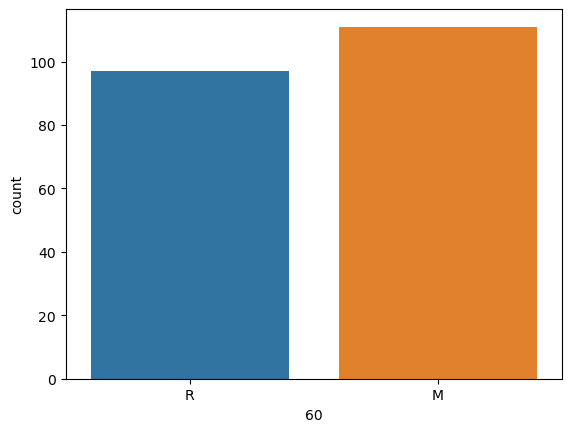

In [22]:
sns.countplot(x = df_[60])
plt.show()

The dataset contains, relatively balanced amount of data.

### The ML Part

In [23]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [24]:
X = df_.iloc[:,:60]
y = df_.iloc[:,60]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(208, 60) (166, 60) (42, 60)


In [27]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [28]:
y_predict = classifier.predict(X_test)

In [29]:
print(accuracy_score(y_predict, y_test))

0.8333333333333334


In [30]:
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

           M       0.95      0.78      0.86        27
           R       0.70      0.93      0.80        15

    accuracy                           0.83        42
   macro avg       0.83      0.86      0.83        42
weighted avg       0.86      0.83      0.84        42



### Making a predictive System.

In [31]:
import numpy as np

In [32]:
input_data = [0.0129,0.0141,0.0309,0.0375,0.0767,0.0787,0.0662,0.1108,0.1777,0.2245,0.2431,0.3134,0.3206,0.2917,0.2249,0.2347,0.2143,0.2939,0.4898,0.6127,0.7531,0.7718,0.7432,0.8673,0.9308,0.9836,1.0000,0.9595,0.8722,0.6862,0.4901,0.3280,0.3115,0.1969,0.1019,0.0317,0.0756,0.0907,0.1066,0.1380,0.0665,0.1475,0.2470,0.2788,0.2709,0.2283,0.1818,0.1185,0.0546,0.0219,0.0204,0.0124,0.0093,0.0072,0.0019,0.0027,0.0054,0.0017,0.0024,0.0029]
npdata = np.array(input_data)
npdata = npdata.reshape(1,-1)

In [33]:
#Taking user inputs of 60 params (aLternative, to make it more user interactive)
# inp = 1
# input_data = []
# while(inp != 61):
#     input_data.append(input(f"Enter parameter {inp}: "))
#     inp = inp + 1 
    
# npdata = np.array(input_data)
# npdata = npdata.reshape(1,-1)

In [34]:
if (classifier.predict(npdata)[0] == "M"):
    print("The object is a Mine")
else:
    print("The object is a Rock")

The object is a Mine
